## Final Assignment: Part 1 - Create Visualizations using Matplotlib, Seaborn & Folium

### Table of Contents
- Objectives
- Setup
- Installing Required Libraries
- Importing Required Libraries
- Scenario
- Data Description
- Importing data
- Creating Visualizations for Data Analysis

#### Objectives

- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations

#### Setup
For this lab, we will be using the following libraries:

- pandas for managing the data.
- numpy for mathematical operations.
- matplotlib for plotting.
- seaborn for plotting.
- Folium for plotting.

In [1]:
#Installing Required Libraries
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

### Scenario
In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.
* recession period 1 - year 1980
* recession period 2 - year 1981 to 1982
* recession period 3 - year 1991
* recession period 4 - year 2000 to 2001
* recession period 5 - year end 2007 to mid 2009
* recession period 6 - year 2020 -Feb to April (Covid-19 Impact)

In [3]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)
print('Data downloaded and read into Dataframe')

Data downloaded and read into Dataframe


In [4]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

#### Creating Visualizations for Data Analysis
##### TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

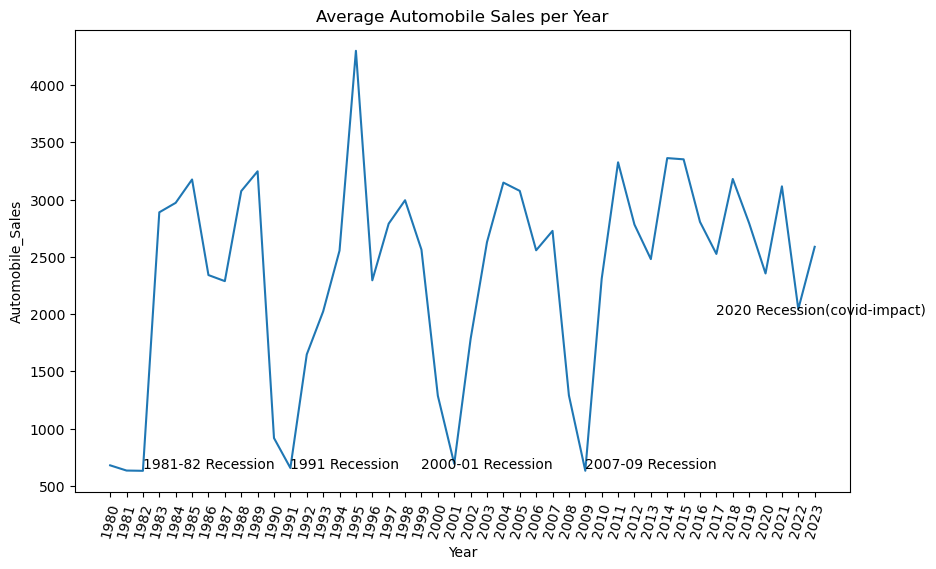

In [20]:
#group the data by years ad calculate the mean of automatic sales
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10, 6))
df_line.plot(kind='line')
plt.xticks(list(range(1980,2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Automobile_Sales')
plt.title('Average Automobile Sales per Year')
plt.text(1982, 650, '1981-82 Recession')
plt.text(1991, 650, '1991 Recession')
plt.text(1999, 650, '2000-01 Recession')
plt.text(2009, 650, '2007-09 Recession')
plt.text(2017, 2000, '2020 Recession(covid-impact)')
plt.show()          

##### TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

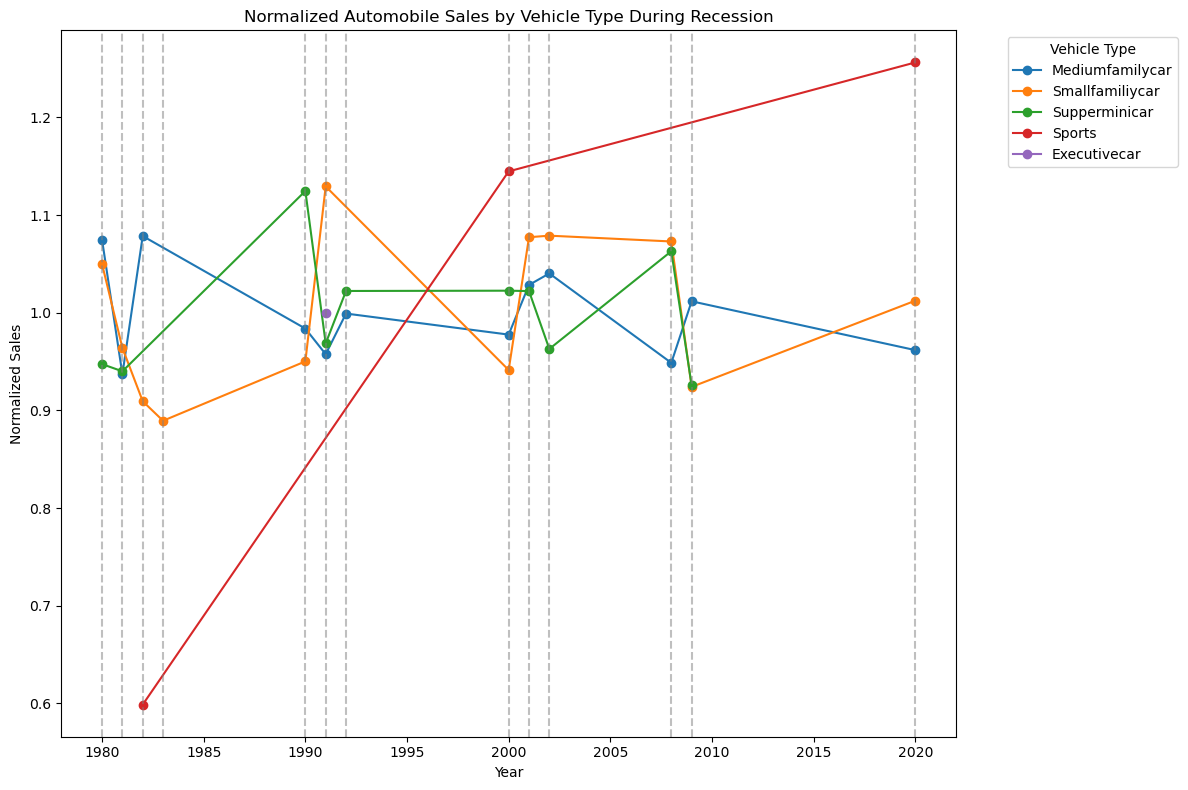

In [24]:
# Assuming 'df' is your dataset
df_rec = df[df['Recession'] == 1]

# Calculate the average automobile sales by year and vehicle type during the recession
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Calculate the normalized sales by dividing by the average sales for each vehicle type
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# Set the 'Year' as the index
df_Mline.set_index('Year', inplace=True)

# Create the plot for each vehicle type
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# Highlight recession years
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

# Add labels, legend, and title
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

# Show the plot
plt.tight_layout()
plt.show()

#### TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

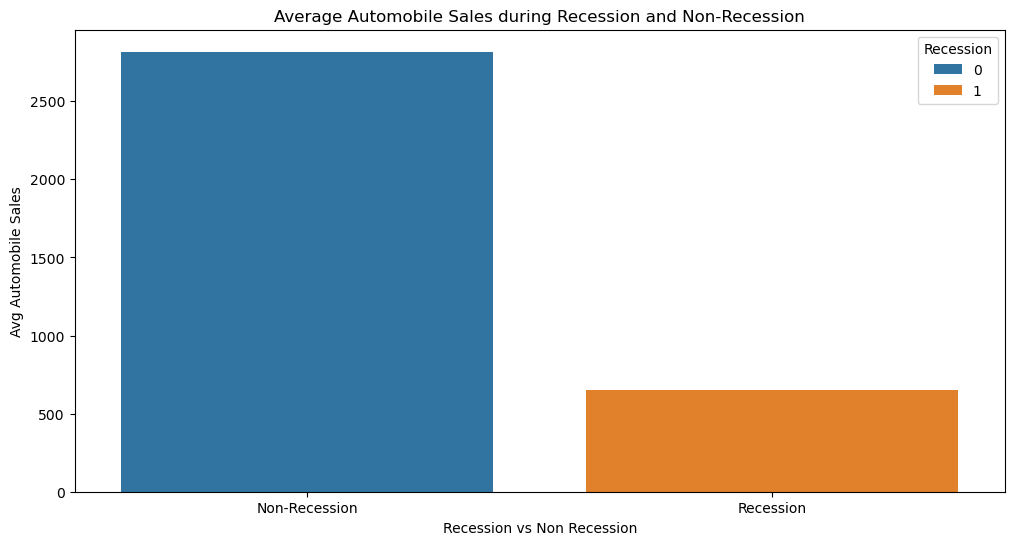

In [27]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(12,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession vs Non Recession')
plt.ylabel('Avg Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

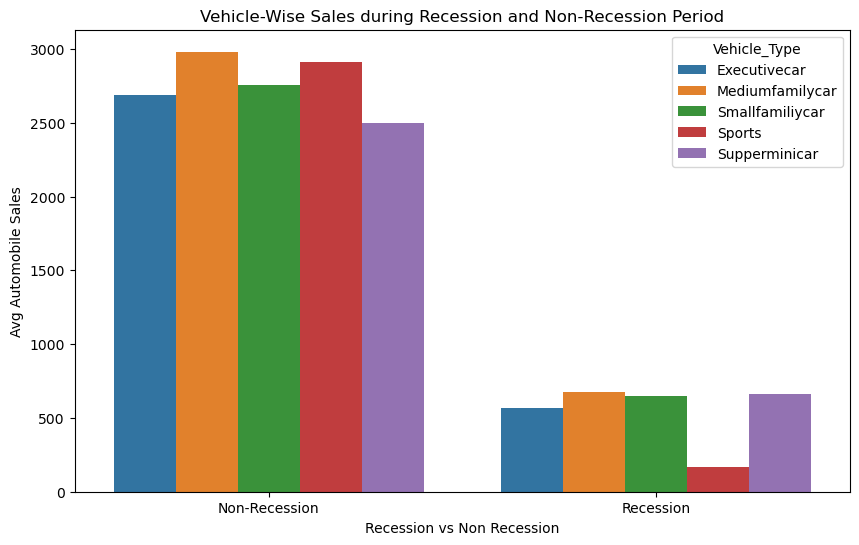

In [33]:
grouped_df = df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=grouped_df)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession vs Non Recession')
plt.ylabel('Avg Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

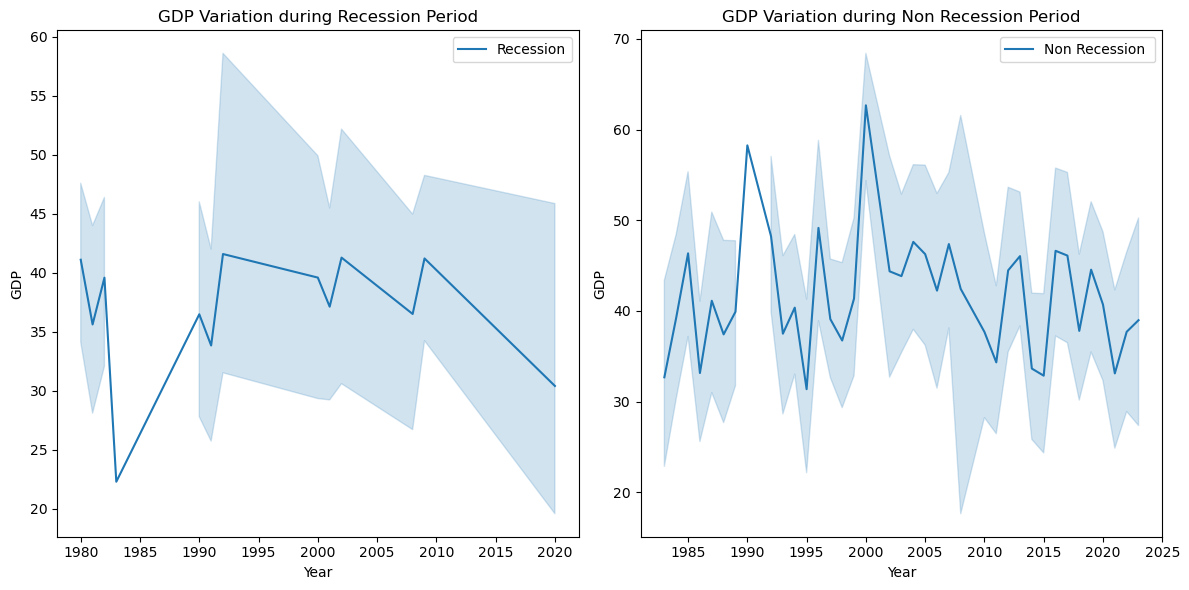

In [36]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
    
#Figure
fig=plt.figure(figsize=(12, 6))
    
#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1 ,2 ,2 ) # add subplot 2 (1 row, 2 columns, second plot). 
    
#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
    
#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non Recession ',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non Recession Period')
    
plt.tight_layout()
plt.show()

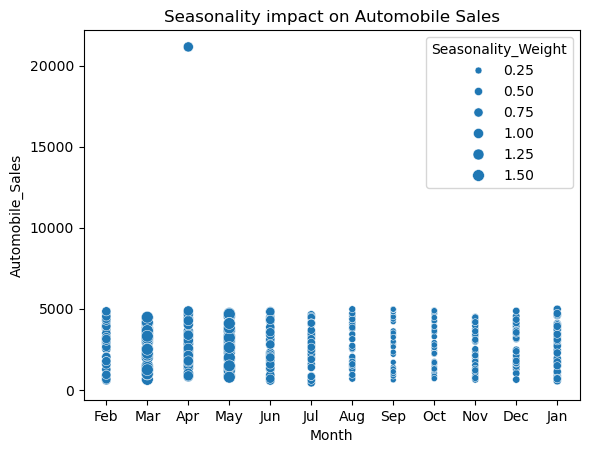

In [39]:
non_rec_data = df[df['Recession'] == 0]
    
size=non_rec_data['Seasonality_Weight'] #for bubble effect
    
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)
    
#you can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

#### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

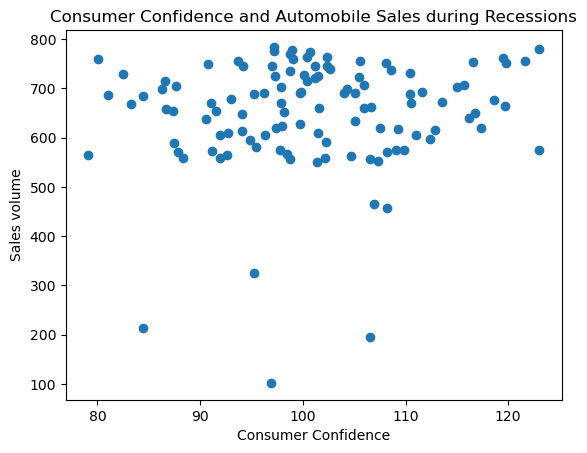

In [40]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
plt.xlabel('Consumer Confidence')
plt.ylabel('Sales volume')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

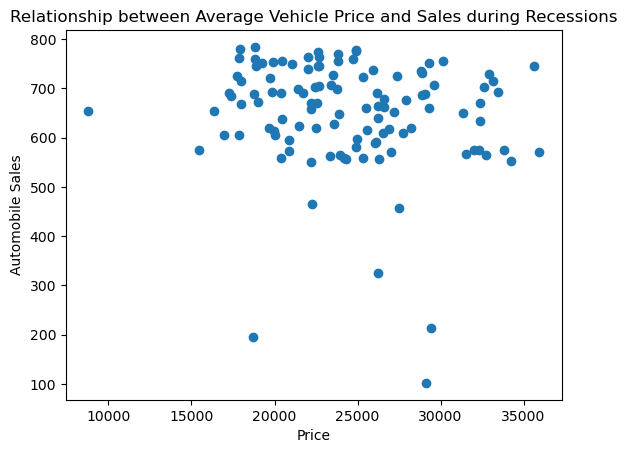

In [43]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

#### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

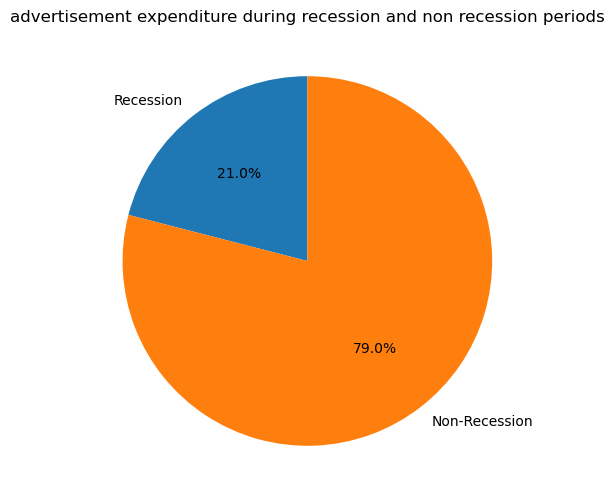

In [45]:
 # Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('advertisement expenditure during recession and non recession periods')

plt.show()

#### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

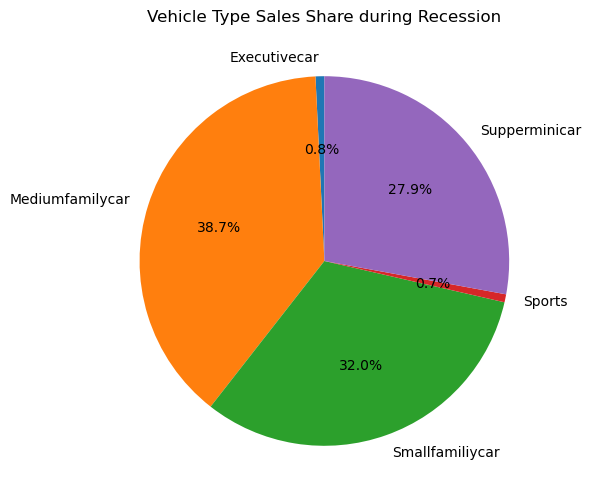

In [46]:
 # Filter the data 
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Automobile_Sales'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Vehicle Type Sales Share during Recession')

plt.show()

#### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.


C:\Users\jayan\AppData\Local\Temp\ipykernel_23832\3525558959.py:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


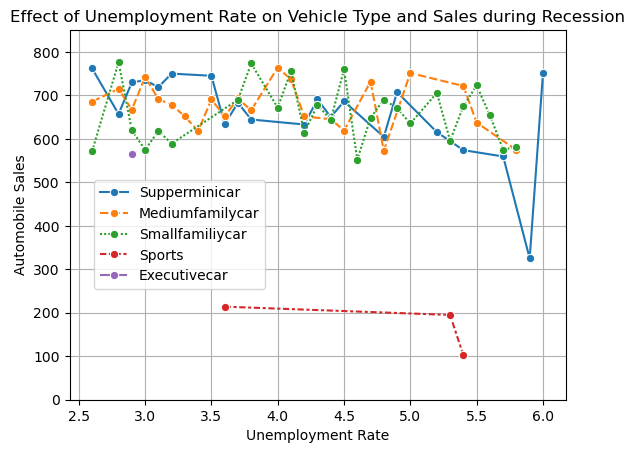

In [53]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.xlabel("Unemployment Rate")
plt.ylabel("Automobile Sales")
plt.title("Effect of Unemployment Rate on Vehicle Type and Sales during Recession")
plt.grid(True)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

In [54]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
df_high = pd.read_csv(path)

ParserError: Error tokenizing data. C error: Expected 71 fields in line 3, saw 2153
